In [1]:
# 載入需要的套件
import os
import numpy as np 
import pandas as pd
import copy
import seaborn as sns
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, Imputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
# 設定 data_path
dir_data = './data/'
Train = os.path.join(dir_data, 'train.csv')
Test = os.path.join(dir_data, 'test.csv')

# 讀取檔案
Train_data = pd.read_csv(Train)
Test_data = pd.read_csv(Test)

In [94]:
ids = Test_data['building_id']

Train_data = Train_data.drop(['building_id'] , axis=1)
Test_data = Test_data.drop(['building_id'] , axis=1)

In [95]:
# 檢查 DataFrame 空缺值的狀態
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    display(missing_data.head(10))
    
def na_check2(df_data):
    #missing data
    total = df_data.isnull().sum().sort_values(ascending=False)
    percent = (df_data.isnull().sum()/df_data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    display(missing_data.head(4))
    
def area_type(row):
    if row >= 0:
        return 1
    else:
        return 0
    
def house_type(row):
    if row == 0:
        return 0
    else:
        return 1
    
def lat_diff(row):
    if row > -38.6:
        return 1
    else:
        return 0
    
def Parking_area_Fill(data):
    if np.isnan(data['parking_area']):
        if not np.isnan(data['Parking_area_Filling']):
            return data['Parking_area_Filling']
    return data['parking_area']

In [96]:
Train_data[Train_data.loc[:,"total_price"] > 3000000000]["total_floor"]
Train_data = Train_data.drop(2138)
Train_data = Train_data.drop(2317)
Train_data = Train_data.drop(32180)
Train_data = Train_data.drop(58858)

Train_data['txn_floor'] = Train_data['txn_floor'].fillna(0)
Train_data[Train_data.loc[:,"total_price"] > 1500000000]["txn_floor"]
Train_data = Train_data.drop(37480)

Train_data[Train_data.loc[:,"total_price"] > 2000000000]["building_complete_dt"]
Train_data = Train_data.drop(9491)
Train_data = Train_data.drop(46934)
Train_data = Train_data.drop(50076)

Train_data.sort_values(by = 'parking_price', ascending = False)[:4]
Train_data = Train_data.drop(55472)
Train_data = Train_data.drop(8795)
#Train_data = Train_data.drop(37480)
Train_data = Train_data.drop(51731)
Train_data = Train_data.drop(1351)

Train_data.sort_values(by = 'parking_area', ascending = False)[:2]
Train_data = Train_data.drop(38617)
Train_data = Train_data.drop(41914)
Train_data = Train_data.drop(4339)
Train_data = Train_data.drop(47253)
Train_data = Train_data.drop(38992)
Train_data = Train_data.drop(35611)
Train_data = Train_data.drop(30232)
Train_data = Train_data.drop(55200)

Train_data.sort_values(by = 'land_area', ascending = False)[:10]
Train_data = Train_data.drop(10670)
Train_data = Train_data.drop(41331)
Train_data = Train_data.drop(39191)
Train_data = Train_data.drop(53966)
Train_data = Train_data.drop(7814)
Train_data = Train_data.drop(13332)
Train_data = Train_data.drop(9785)
Train_data = Train_data.drop(14007)
#Train_data = Train_data.drop(50076)
Train_data = Train_data.drop(2086)
Train_data = Train_data.drop(36482)
Train_data = Train_data.drop(11170)
Train_data = Train_data.drop(16838)
Train_data = Train_data.drop(44123)
Train_data = Train_data.drop(59506)
Train_data = Train_data.drop(37526)
Train_data = Train_data.drop(29570)
Train_data = Train_data.drop(23399)

Train_data.sort_values(by = 'building_area', ascending = False)[:20]
#Train_data = Train_data.drop(9491)
#Train_data = Train_data.drop(46934)
Train_data = Train_data.drop(16846)
Train_data = Train_data.drop(16817)
Train_data = Train_data.drop(26767)
Train_data = Train_data.drop(33373)
Train_data = Train_data.drop(18748)
Train_data = Train_data.drop(43513)
Train_data = Train_data.drop(13096)
Train_data = Train_data.drop(20546)
Train_data = Train_data.drop(23605)
Train_data = Train_data.drop(29104)
Train_data = Train_data.drop(21239)
Train_data = Train_data.drop(53345)
Train_data = Train_data.drop(14944)
Train_data = Train_data.drop(44963)
Train_data = Train_data.drop(26014)
Train_data = Train_data.drop(21231)
Train_data = Train_data.drop(36955)

Train_data.sort_values(by = 'I_MIN', ascending = False)[:2]["I_MIN"]
Train_data = Train_data.drop(9119)
Train_data = Train_data.drop(3327)

Train_data.sort_values(by = 'III_MIN', ascending = False)[:3]["III_MIN"]
Train_data = Train_data.drop(52324)
Train_data = Train_data.drop(16859)
Train_data = Train_data.drop(53310)

Train_data.sort_values(by = 'V_MIN', ascending = False)[:2]["V_MIN"]
Train_data = Train_data.drop(9124)
Train_data = Train_data.drop(58248)

Train_data.sort_values(by = 'VII_MIN', ascending = False)[:5]["VII_MIN"]
Train_data = Train_data.drop(25569)
Train_data = Train_data.drop(58812)
Train_data = Train_data.drop(1011)
Train_data = Train_data.drop(34303)
Train_data = Train_data.drop(46392)

Train_data.sort_values(by = 'VIII_MIN', ascending = False)[:5]["VIII_MIN"]
Train_data = Train_data.drop(8686)
Train_data = Train_data.drop(25855)
Train_data = Train_data.drop(2652)

Train_data.sort_values(by = 'XI_MIN', ascending = False)[:5]["XI_MIN"]
Train_data = Train_data.drop(53654)
Train_data = Train_data.drop(15654)
Train_data = Train_data.drop(50764)

Train_data.sort_values(by = 'XII_MIN', ascending = False)[:5]["XII_MIN"]
Train_data = Train_data.drop(32153)
Train_data = Train_data.drop(57831)

#Train_data[Train_data.loc[:,"total_price"] > 21]["XIII_MIN"]
#Train_data = Train_data.drop(58858)

In [97]:
train_Y = np.log1p(Train_data['total_price'])
Train_data = Train_data.drop(['total_price'] , axis=1)

df = pd.concat([Train_data,Test_data])
df.head()

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,parking_price,...,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN
0,8,21,18674,4,3,2,6271,2,NaN,NaN,...,21,58,1,157,1,2483,1,6011,1,34.469803
1,8,7,18800,5,1,2,7885,2,NaN,NaN,...,7,28,1,115,1,15872,1,32221,1,40.073573
2,8,7,19289,4,1,2,6028,2,NaN,NaN,...,27,78,1,212,1,15760,1,32228,1,54.462081
3,8,21,20385,24,0,2,18325,0,NaN,81138.889762,...,2,20,1,125,1,2568,1,7271,1,99.628966
4,1,21,20657,2,4,2,6880,2,NaN,NaN,...,2,18,1,47,1,2587,1,7442,1,124.131236


In [98]:
train_num = train_Y.shape[0]

df['txn_floor'] = df['txn_floor'].fillna(0)
df["house_type"] = df['txn_floor'].apply(house_type)
df["lat_diff"] = df['lat'].apply(lat_diff)

In [99]:
parking_price = df['parking_price']
parking_area = df['parking_area']

df = df.drop(['parking_price'] , axis=1)
df = df.drop(['parking_area'] , axis=1)

df = df.fillna(df.mean())
df['parking_price'] = parking_price
df['parking_area'] = parking_area

In [100]:
park_not_null = df[df['parking_price'].notnull()]
park_is_null = df[df['parking_price'].isnull()].drop(['parking_price'] , axis=1)

park_X = park_not_null.drop(['parking_price'] , axis=1)
park_Y = np.log1p(park_not_null['parking_price'])

XGB = xgb.XGBRegressor()
XGB.fit(park_X, park_Y)

park_pred = XGB.predict(park_is_null)
df.loc[df['parking_price'].notnull(), 'parking_price'] = np.log1p(park_not_null['parking_price'])
df.loc[df['parking_price'].isnull(), 'parking_price'] = park_pred

df.head()

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,txn_floor,land_area,...,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,house_type,lat_diff,parking_price,parking_area
0,8,21,18674,4,3,2,6271,2,3.0,18.144460,...,1,2483,1,6011,1,34.469803,1,0,5.436403,NaN
1,8,7,18800,5,1,2,7885,2,5.0,11.387227,...,1,15872,1,32221,1,40.073573,1,1,10.484933,NaN
2,8,7,19289,4,1,2,6028,2,1.0,21.426802,...,1,15760,1,32228,1,54.462081,1,1,10.477659,NaN
3,8,21,20385,24,0,2,18325,0,13.0,11.387227,...,1,2568,1,7271,1,99.628966,1,0,11.303930,NaN
4,1,21,20657,2,4,2,6880,2,0.0,61.306524,...,1,2587,1,7442,1,124.131236,0,0,8.287141,NaN


In [101]:
park_area_not_null = df[df['parking_area'].notnull()]
park_area_is_null = df[df['parking_area'].isnull()].drop(['parking_area'] , axis=1)

park_area_X = park_area_not_null.drop(['parking_area'] , axis=1)
park_area_Y = park_area_not_null['parking_area']

XGBR = xgb.XGBRegressor()
XGBR.fit(park_area_X, park_area_Y)

park_area_pred = XGBR.predict(park_area_is_null)

df.loc[df['parking_area'].isnull(), 'parking_area'] = park_area_pred

df.head()

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,txn_floor,land_area,...,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,house_type,lat_diff,parking_price,parking_area
0,8,21,18674,4,3,2,6271,2,3.0,18.144460,...,1,2483,1,6011,1,34.469803,1,0,5.436403,4.278985
1,8,7,18800,5,1,2,7885,2,5.0,11.387227,...,1,15872,1,32221,1,40.073573,1,1,10.484933,2.864383
2,8,7,19289,4,1,2,6028,2,1.0,21.426802,...,1,15760,1,32228,1,54.462081,1,1,10.477659,2.450958
3,8,21,20385,24,0,2,18325,0,13.0,11.387227,...,1,2568,1,7271,1,99.628966,1,0,11.303930,5.571222
4,1,21,20657,2,4,2,6880,2,0.0,61.306524,...,1,2587,1,7442,1,124.131236,0,0,8.287141,1.145004


In [117]:
temp_df = copy.deepcopy(df)

In [118]:
temp_df = temp_df.fillna(temp_df.mean())

temp_df["parking_price"] = temp_df["parking_price"].clip(0.1, temp_df["parking_price"].max())
temp_df["parking_area"] = temp_df["parking_area"].clip(0.1, temp_df["parking_area"].max())

temp_df["txn_dt"] = temp_df["txn_dt"]/100
temp_df["building_complete_dt"] = temp_df["building_complete_dt"]/100

temp_df["village_income_median"] = np.log1p(temp_df["village_income_median"])

temp_df["town_area"] = temp_df["town_area"].clip(1, 150)

temp_df["total_building_area"] = temp_df["building_area"] * temp_df["total_floor"]
temp_df["total_income"] = np.log1p(temp_df["village_income_median"] * temp_df["town_population"])
temp_df["area_percent"] = temp_df["land_area"] / temp_df["town_area"]
temp_df["per_parking_price"] = np.log1p(np.expm1(temp_df["parking_price"]) / temp_df["parking_area"])

temp_df["area_diff"] = temp_df["land_area"] - temp_df["building_area"]
temp_df['area_type'] = temp_df['area_diff'].apply(area_type)
#temp_df = temp_df.drop(['area_diff'] , axis=1)

temp_df = temp_df.fillna(temp_df.mean())

train_num = train_Y.shape[0]
train_X = temp_df[:train_num]
test_X = temp_df[train_num:]

In [119]:
temp_df = temp_df.drop(['doc_rate', 'master_rate', "bachelor_rate", 'jobschool_rate', 'highschool_rate', "elementary_rate"] , axis=1)
temp_df = temp_df.drop(['XIII_5000'] , axis=1)

temp_df = temp_df.drop(['town'] , axis=1)
temp_df = temp_df.drop(['village'] , axis=1)

In [120]:
temp_df.reset_index(drop=True, inplace=True)
train_Y.reset_index(drop=True, inplace=True)

In [82]:
temp_df['lon_'] = pd.qcut(temp_df['lon'], 6)

lon_intervals = temp_df.lon_.unique()
temp_df.lon_.replace(to_replace = lon_intervals[0],value = 1, inplace = True)
temp_df.lon_.replace(to_replace = lon_intervals[1],value = 2, inplace = True)
temp_df.lon_.replace(to_replace = lon_intervals[2],value = 3, inplace = True)
temp_df.lon_.replace(to_replace = lon_intervals[3],value = 4, inplace = True)
temp_df.lon_.replace(to_replace = lon_intervals[4],value = 5, inplace = True)
temp_df.lon_.replace(to_replace = lon_intervals[5],value = 6, inplace = True)

temp_df = temp_df.drop(['lon'] , axis=1)

print(temp_df.lon_.value_counts())

2    13726
3    12055
1    11931
6    11361
5    11176
4     9677
Name: lon_, dtype: int64


In [83]:
temp_df['lat_'] = pd.qcut(temp_df['lat'], 6)

lat_intervals = temp_df.lat_.unique()
temp_df.lat_.replace(to_replace = lat_intervals[0],value = 1, inplace = True)
temp_df.lat_.replace(to_replace = lat_intervals[1],value = 2, inplace = True)
temp_df.lat_.replace(to_replace = lat_intervals[2],value = 3, inplace = True)
temp_df.lat_.replace(to_replace = lat_intervals[3],value = 4, inplace = True)
temp_df.lat_.replace(to_replace = lat_intervals[4],value = 5, inplace = True)
temp_df.lat_.replace(to_replace = lat_intervals[5],value = 6, inplace = True)

temp_df = temp_df.drop(['lat'] , axis=1)

print(temp_df.lat_.value_counts())

5    14235
4    11895
1    11697
3    11426
6    11302
2     9371
Name: lat_, dtype: int64


In [121]:
Data = pd.concat([temp_df[:train_num], train_Y], axis=1)
test_Data = temp_df[train_num:]

temp_df["txn_floor"] = temp_df["txn_floor"].astype('int')

cols = ["city", "building_type", "building_use", "total_floor", "txn_floor", "lon", "lat"]

for c in cols:
    
    mean_df = Data.groupby([c])['total_price'].mean().reset_index()
    mean_df.columns = [c, f'{c}_mean']
    
    Data = pd.merge(Data, mean_df, on= c, how='left')
    Data = Data.drop([c] , axis=1)
    
    test_Data = pd.merge(test_Data, mean_df, on= c, how='left')   
    test_Data = test_Data.drop([c] , axis=1)
    
Data = Data.drop(['total_price'] , axis=1)

temp_df = pd.concat([Data,test_Data])
temp_df.head()

,building_material,txn_dt,building_complete_dt,parking_way,land_area,building_area,village_income_median,town_population,town_area,town_population_density,...,per_parking_price,area_diff,area_type,city_mean,building_type_mean,building_use_mean,total_floor_mean,txn_floor_mean,lon_mean,lat_mean
0,8,186.74,62.71,2,18.144460,3.418175,6.350886,24219.0,1.4161,17103.0,...,3.996867,14.726285,1,14.760251,15.616688,15.494418,15.601214,15.427320,14.625019,14.841126
1,8,188.00,78.85,2,11.387227,4.041309,6.311735,551480.0,23.1373,23835.0,...,9.432632,7.345919,1,15.731945,15.368033,15.494418,15.396904,15.357832,15.483269,15.907105
2,8,192.89,60.28,2,21.426802,5.584279,6.439350,551480.0,23.1373,23835.0,...,9.581221,15.842523,1,15.731945,15.368033,15.494418,15.601214,15.781742,15.681289,16.098430
3,8,203.85,183.25,0,11.387227,13.563031,6.857514,139259.0,14.7523,9440.0,...,9.586372,-2.175803,0,14.760251,15.835580,15.494418,16.127585,15.832799,14.723749,15.345815
4,1,206.57,68.80,2,61.306524,4.688108,6.285998,112397.0,71.0400,1582.0,...,8.151770,56.618416,1,14.760251,15.420499,15.494418,14.951294,15.420499,14.783370,14.291252


In [177]:
temp_df2 = copy.deepcopy(temp_df)

In [178]:
temp_df2 = temp_df2.fillna(temp_df2.mean())

train_num = train_Y.shape[0]
train_X = temp_df2[:train_num]
test_X = temp_df2[train_num:]

In [179]:
temp_train = copy.deepcopy(train_X)
temp_train["total_price"] = train_Y

corr = temp_train.corr()["total_price"]
high_feature = corr[abs(corr) >= 0.001]

In [180]:
high_feature = list(high_feature.index)

remove = []

for f in high_feature:
    if ("index" in f):
        remove.append(f)
    elif ("0" in f) and (int(f.split("_")[1]) < 5000):
        remove.append(f)
    if ("MIN" in f):
        remove.append(f)
        
for f in remove:
    high_feature.remove(f)

In [181]:
high_feature.remove("total_price")
train_X = train_X[high_feature]
test_X = test_X[high_feature]

In [182]:
est = RandomForestRegressor()
est.fit(train_X, train_Y)
feats_est = pd.Series(data=est.feature_importances_, index=train_X.columns)
feats_est = feats_est.sort_values(ascending=False)
feats_est

/home/rex/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


parking_price              0.371689
building_area              0.356723
lon_mean                   0.084397
land_area                  0.015874
XIII_10000                 0.013794
building_complete_dt       0.009846
area_diff                  0.009293
city_mean                  0.008067
txn_dt                     0.007986
per_parking_price          0.007261
junior_rate                0.007099
total_building_area        0.006220
total_income               0.006075
village_income_median      0.005681
divorce_rate               0.005095
house_type                 0.005090
area_percent               0.004965
txn_floor_mean             0.004330
XIV_5000                   0.004098
VII_10000                  0.003849
parking_area               0.003742
XII_5000                   0.003711
parking_way                0.003517
lat_mean                   0.003415
XIV_10000                  0.002898
VI_5000                    0.002397
III_10000                  0.002287
V_5000                     0

In [183]:
corr[high_feature].sort_values(ascending=False)

parking_price              0.613915
lon_mean                   0.584452
city_mean                  0.560543
parking_area               0.510680
XIII_10000                 0.490170
VII_10000                  0.485678
IX_10000                   0.479959
V_10000                    0.479498
lat_mean                   0.477670
VIII_10000                 0.470670
III_10000                  0.463622
XI_10000                   0.460193
X_10000                    0.460166
VI_10000                   0.457410
II_10000                   0.455389
XII_10000                  0.451279
building_area              0.446591
village_income_median      0.440878
IV_10000                   0.435527
V_5000                     0.429242
total_building_area        0.427032
VII_5000                   0.422224
I_10000                    0.415625
VIII_5000                  0.404384
IX_5000                    0.402567
XI_5000                    0.393679
X_5000                     0.390892
III_5000                   0

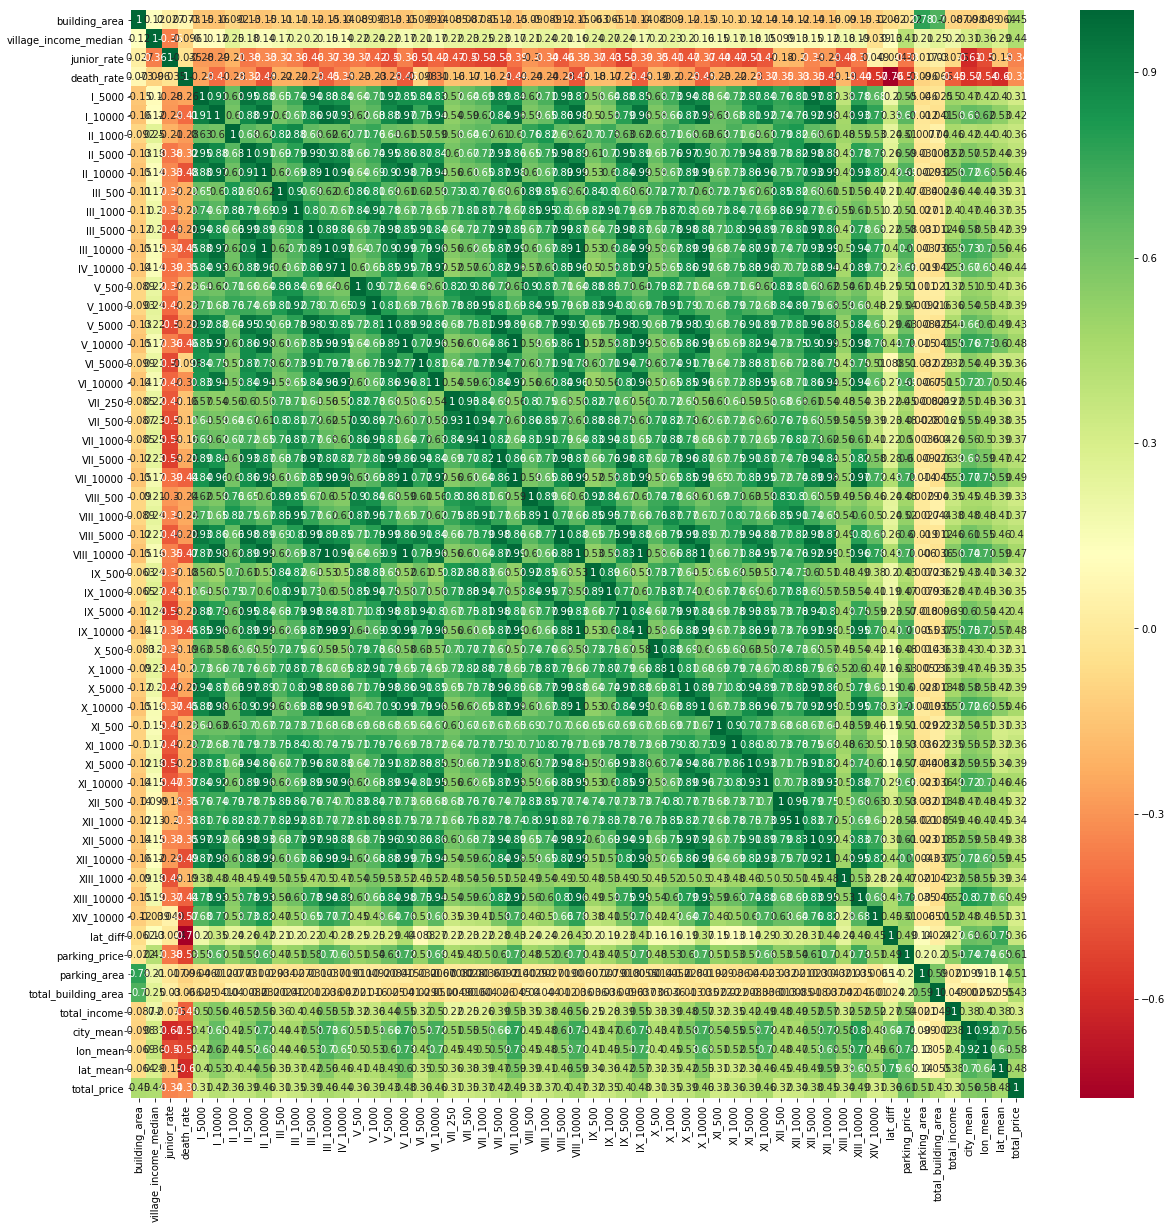

In [161]:
high_feature.append("total_price")
corrmat = temp_train[high_feature].corr()
top_corr_features = corrmat.index[abs(corrmat["total_price"])>0.3]

plt.figure(figsize=(20,20))
g = sns.heatmap(temp_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [184]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.25, random_state=4)

estimator_ = RandomForestRegressor()
estimator_.fit(x_train, y_train)

print(cross_val_score(estimator_, x_train, y_train, cv=5).mean())

y_pred = estimator_.predict(x_test)
print("Mean squared error: %.4f"
      % mean_squared_error(y_test, y_pred))

/home/rex/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9398321776676968
Mean squared error: 0.0782


In [185]:
estimator_ = RandomForestRegressor()
estimator_.fit(train_X, train_Y)

predict = estimator_.predict(test_X)

test_price = np.expm1(predict)

submit = pd.DataFrame(ids)
submit['total_price'] = test_price
submit.to_csv("2019-07-08.csv",index=False)

/home/rex/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
